In [1]:
import pynbody
from pynbody.analysis import profile
import matplotlib.pylab as plt
import numpy as np
import astropy.units as u
from astropy.io import ascii
from astropy.table import Table
import pandas as pd
%matplotlib inline
from analyze_sumfiles import get_sumfile

In [2]:
datpath_k = "/home/michele/sim/MySimulations/Moria8Gyr_tidal/results/sumfiles/69002.dat"
datpath = "/home/michele/sim/MoRIA/results/sumfiles/69002.dat"

In [3]:
a = get_sumfile(datpath)
k = get_sumfile(datpath_k)

In [4]:
a

nr,time,redshift,ngas,nstar,ndark,Mgas,Mstar,Mdark,MHI,r_e_L,r_e_M,r_e_M_DM,velDisp_star,velDisp_DM,kinE_star,kinE_DM,SFR,M_U,M_B,M_V,M_R,M_I,M_J,M_H,M_K,metall_star,FeH_star,MgFe_star,metall_lum,FeH_lum,age_lum,Mgas_re,Mstar_re,Mdark_re,rcom_x,rcom_y,rcom_z,vcom_x,vcom_y,vcom_z,L_x,L_y,L_z,r0,sig(r0),n,sig(n),mu0,sig(mu0),gas<1Re,gas<2Re,gas<3Re,gas<4Re,gas<5Re,gas<10Re,gas<30Re,gas_all,DM<1Re,DM<2Re,DM<3Re,DM<4Re,DM<5Re,DM<10Re,DM<30Re,DM_all
,kpc s / km,,,,,1e+06 solMass,1e+06 solMass,1e+06 solMass,1e+06 solMass,kpc,kpc,kpc,km / s,km / s,km / s,1e+06 km solMass / s,solMass / yr,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,1e+06 solMass,1e+06 solMass,1e+06 solMass,km,km,km,km / s,km / s,km / s,km2 / s,km2 / s,km2 / s,kpc,kpc,,,arcsec2 mag,arcsec2 mag,,,,,,,,,,,,,,,,
int64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64
0,5.0,1.1565,928930.0,6580,935510.0,9842.8,50.489,46777,436.57,1.2665,1.6495,4.6985,20.084,42.595,51993.0,48421000.0,0.0,-15.29,-15.091,-15.475,-15.813,-16.182,nan,nan,nan,0.0005579,-1.9022,0.45313,0.0010742,-1.5772,1.5248,100.88,197.5,310.16,0.89616,5.7208,-10.86,2.1808,-1.6997,-2.997,2.1808,-1.6997,-2.997,0.70844,0.30356,0.7134,0.51562,22.956,0.58067,0.0069957,0.020412,0.034587,0.045844,0.052126,0.064094,0.088615,1,0.0024884,0.011526,0.023902,0.038089,0.05244,0.11811,0.26366,1
1,5.0,1.1637,928930.0,6580,935510.0,9842.8,50.489,46777,442.17,1.2655,1.6485,4.6995,19.461,42.594,51991.0,48421000.0,0.0,-15.29,-15.091,-15.475,-15.813,-16.182,nan,nan,nan,0.0005579,-1.9022,0.45313,0.0010741,-1.5772,1.5249,100.77,197.1,309.64,0.89422,5.7219,-10.86,2.181,-1.7002,-2.9956,2.181,-1.7002,-2.9956,0.70982,0.33325,0.74711,0.57132,22.951,0.61231,0.0069871,0.020415,0.034593,0.045844,0.052131,0.064095,0.088614,1,0.0024948,0.011526,0.023901,0.038088,0.052444,0.11811,0.26366,1
2,5.05,1.1492,928880.0,6626,935510.0,9842.3,50.931,46777,443.86,1.4355,1.7905,4.8825,17.066,33.857,46651.0,47311000.0,0.009855,-15.247,-15.069,-15.472,-15.82,-16.199,nan,nan,nan,0.00056729,-1.8944,0.45273,0.0010665,-1.5785,1.5719,97.124,217.5,325.34,0.61347,4.8346,-10.203,1.9998,-2.1862,-0.73486,1.9998,-2.1862,-0.73486,0.047705,181810000.0,-0.03258,2642700000.0,24.156,0.10102,0.0045149,0.019432,0.038444,0.048097,0.053463,0.064709,0.088879,1,0.0018759,0.010327,0.023757,0.038032,0.052106,0.11225,0.26478,1
3,5.1,1.1349,928790.0,6717,935510.0,9841.5,51.766,46777,461.22,1.4615,1.8195,5.1225,15.968,32.968,44642.0,46907000.0,0.019562,-15.313,-15.116,-15.504,-15.843,-16.215,nan,nan,nan,0.00059096,-1.8755,0.45204,0.0011051,-1.5622,1.5209,116.29,212.85,340.23,0.40206,4.7185,-10.058,1.7326,-2.2427,-0.053696,1.7326,-2.2427,-0.053696,0.23302,1.5096,2.3238,4.9732,22.574,3.0711,0.0066448,0.019863,0.037988,0.048139,0.054289,0.065257,0.089164,1,0.0018364,0.009524,0.021601,0.035404,0.049436,0.10806,0.26688,1
4,5.15,1.1208,928730.0,6778,935510.0,9841.0,52.299,46777,457.97,1.1925,1.6245,5.2365,14.929,36.272,47198.0,47783000.0,0.013128,-15.316,-15.118,-15.5,-15.836,-16.202,nan,nan,nan,0.00060774,-1.8629,0.45168,0.0011314,-1.5521,1.5351,96.136,150.1,257.52,0.71919,4.8095,-10.567,3.1096,-2.804,-1.4842,3.1096,-2.804,-1.4842,0.99037,0.038335,0.10965,0.079627,23.604,0.14868,0.0067281,0.021027,0.03481,0.047936,0.055519,0.065782,0.089582,1,0.0021026,0.010216,0.021571,0.034539,0.048017,0.10655,0.26801,1
5,5.2,1.1069,928650.0,6856,935510.0,9840.3,52.976,46777,447.4,1.4465,1.7445,5.2265,27.238,40.488,45740.0,49018000.0,0.016789,-15.333,-15.137,-15.52,-15.856,-16.224,nan,nan,nan,0.00062819,-1.8478,0.45126,0.0011738,-1.5367,1.5258,99.101,213.4

In [5]:
# fig, (ax1, ax2) = plt.subplots(2)
# ax1.plot(a.time, a.r_e_M)
# ax2.plot(k.time, k.r_e_M)


In [6]:
def plot_property(a, k, prop, unit=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    if unit is None:
        unit = k[prop].unit
    time = a['time'].to(u.Gyr)
    ax.plot(time, a[prop].to(unit), "r", label="MoRIA")
    k2 = np.interp(a['time'], k['time'], k[prop].to(unit), left=np.nan)
    ax.plot(time[:-1], k2[:-1], label="Kicked")
    ax.set_xlabel('time (Gyr)')
    if unit is not u.dimensionless_unscaled:
        ax.set_ylabel("{0} ({1:latex})".format(prop,unit))
    else:
        ax.set_ylabel("{0}".format(prop))
    ax.set_title(prop)
    plt.legend(loc=0)

In [7]:
# k[['time','SFR', 'Mstar']]

In [8]:
# fig, axes = plt.subplots(nrows=2, ncols=2)

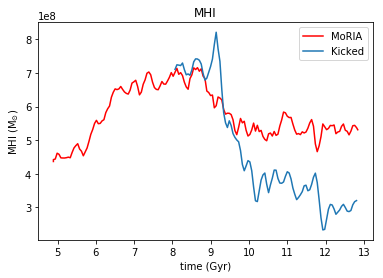

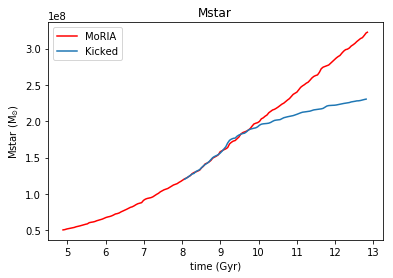

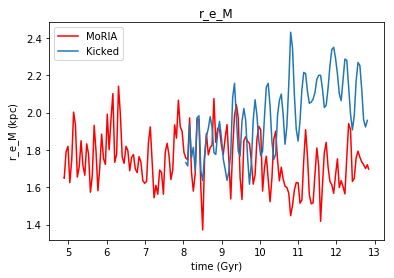

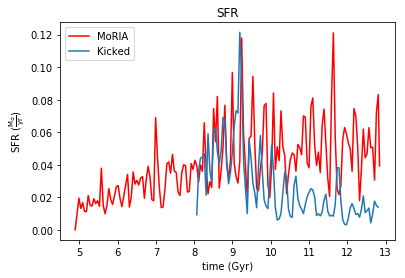

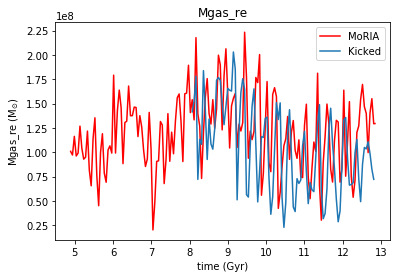

In [9]:
plot_property(a, k, 'MHI', u.Msun)
plot_property(a, k, 'Mstar', u.Msun)
plot_property(a, k, 'r_e_M')
plot_property(a, k, 'SFR')
plot_property(a, k, 'Mgas_re', u.Msun)

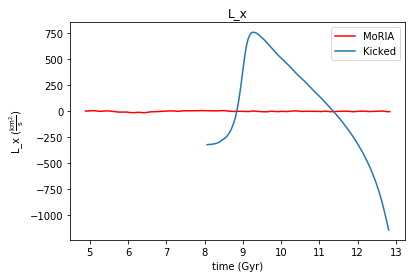

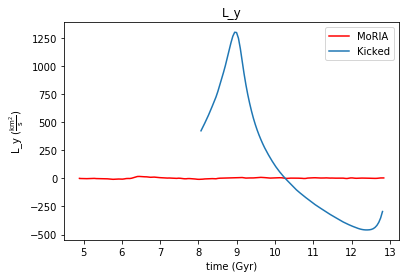

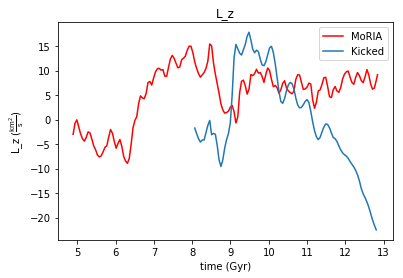

In [10]:
plot_property(a, k, 'L_x')
plot_property(a, k, 'L_y')
plot_property(a, k, 'L_z')

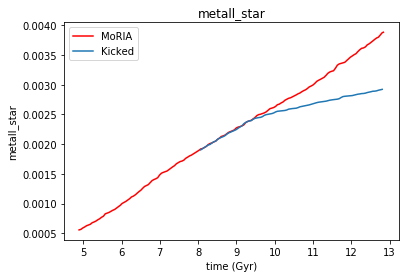

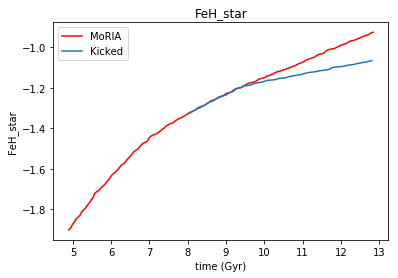

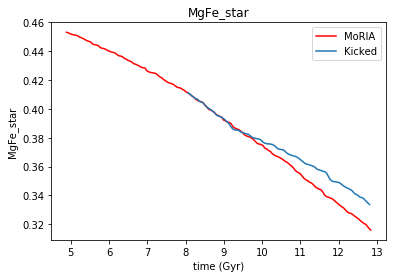

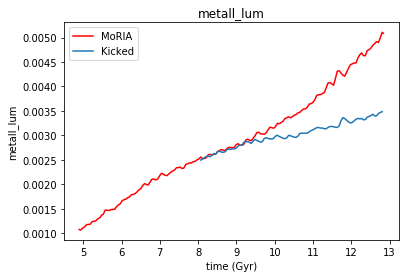

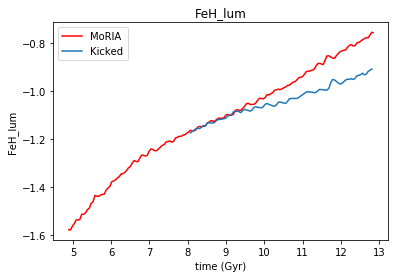

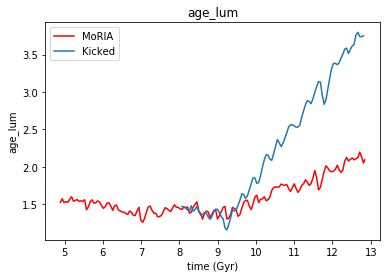

In [11]:
plot_property(a, k, 'metall_star')
plot_property(a, k, 'FeH_star')
plot_property(a, k, 'MgFe_star')
plot_property(a, k, 'metall_lum')
plot_property(a, k, 'FeH_lum')
plot_property(a, k, 'age_lum')

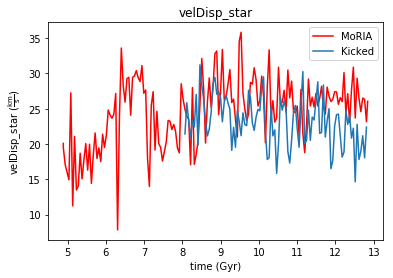

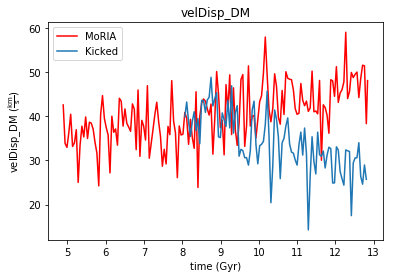

In [12]:
plot_property(a, k, 'velDisp_star')
plot_property(a, k, 'velDisp_DM')

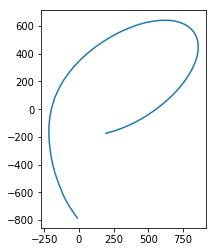

In [13]:
fig, ax = plt.subplots()
ax.plot(k['rcom_x'], k['rcom_y'])
ax.set_aspect('equal')